# **MODS 207 NoteBook :** IMDb Analysis
* **Group members :** Farah Jabri, Lauryne Moyse
* **Topic :** Analysis of award-nominated movies reviews

## I- CLEANING

This part consist in harmonizing our database as well as putting all the data in an exploitable shape.

### 1) Importations

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import math as mt
import plotly.express as px
#from google.colab import drive

In [4]:
#drive.mount('/content/drive')

In [3]:
#df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/imdb_database_not_clean.csv')
df = pd.read_csv('./imdb_database_not_clean.csv')

In [6]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'year', 'movie_title',
       'movie_id', 'date_nomination', 'date_award', 'nom_actor', 'nom_actress',
       'nom_anime', 'nom_foreign', 'nom_direct', 'nom_doc', 'nom_pict',
       'nom_screen', 'tot_nom', 'award_actor', 'award_actress', 'award_anime',
       'award_foreign', 'award_direct', 'award_doc', 'award_pict',
       'award_screen', 'tot_award', 'total', 'url', 'nb_reviews', 'ratings',
       'dates', 'authors', 'author_links', 'review_titles', 'texts'],
      dtype='object')

In [4]:
#dropping some useless columns due to concatenation
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('Unnamed: 0.1', axis=1, inplace=True)
df.drop('Unnamed: 0.1.1', axis=1, inplace=True)

In [8]:
df.head(3)

,year,movie_title,movie_id,date_nomination,date_award,nom_actor,nom_actress,nom_anime,nom_foreign,nom_direct,...,tot_award,total,url,nb_reviews,ratings,dates,authors,author_links,review_titles,texts
0,1995,Leaving Las Vegas,tt0113627,1996-02-13,1996-03-25,1,1,0,0,1,...,1,4,https://www.imdb.com/title/tt0113627/reviews?s...,398 Reviews,"['\n\n\n\n\n\n4/10\n', '\n\n\n\n\n\n8/10\n', '...","['27 May 2023', '20 May 2023', '11 May 2023', ...","['mmorgan-47128', 'filipemanuelneto', 'ASuiGen...","['/user/ur154351177/?ref_=tt_urv', '/user/ur53...","[' Great acting, terrible movie\n', ' A dense ...",['starthere I heard this was a highly praised ...
1,1995,Mr. Holland's Opus,tt0113862,1996-02-13,1996-03-25,1,0,0,0,0,...,0,1,https://www.imdb.com/title/tt0113862/reviews?s...,192 Reviews,"['\n\n\n\n\n\n1/10\n', '\n\n\n\n\n\n2/10\n', '...","['25 May 2023', '9 February 2023', '1 February...","['hgfzbj', 'acfurst', 'Erick_AC', 'ilovetesh',...","['/user/ur130831614/?ref_=tt_urv', '/user/ur15...","[' Terrible movie with even worse message.\n',...",['starthere Lazy creep wants to sit around the...
2,1995,Nixon,tt0113987,1996-02-13,1996-03-25,1,0,0,0,0,...,0,1,https://www.imdb.com/title/tt0113987/reviews?s...,180 Reviews,"['\n\n\n\n\n\n8/10\n', '\n\n\n\n\n\n9/10\n', '...","['9 May 2023', '8 November 2022', '24 August 2...","['HistoryOfMovies', 'bellino-angelo2014', 'Njs...","['/user/ur144384572/?ref_=tt_urv', '/user/ur57...",[' A Riveting Biopic that Unveils the Man Behi...,"['starthere No review', 'starthere No review',..."


### 2) Treating missing values

In [11]:
#missing values
df.isna().sum()

year               0
movie_title        0
movie_id           0
date_nomination    0
date_award         0
nom_actor          0
nom_actress        0
nom_anime          0
nom_foreign        0
nom_direct         0
nom_doc            1
nom_pict           0
nom_screen         0
tot_nom            0
award_actor        0
award_actress      0
award_anime        0
award_foreign      0
award_direct       0
award_doc          0
award_pict         0
award_screen       0
tot_award          0
total              0
url                0
nb_reviews         0
ratings            0
dates              0
authors            0
author_links       0
review_titles      0
texts              0
dtype: int64

In [114]:
df.dropna(inplace=True)

Some columns are empty :

In [115]:
df.texts[134]

'[]'

In [116]:
# We drop the movies with 0 reviews
for i in df.index:
  if((df == '[]').any(axis=1)[i]):
    df = df.drop(index=i)

In [13]:
len(df)

648

### 3) Column 'spoilers_id'
**Don't run this part (we finally did not use the file)**

The reviews containing spoilers were not displayed. Therefore, their text were not scraped.
<br> We decided to store the ids of the reviews containing spoilers, just in case.

In [14]:
spoilers_id = pd.read_csv('./spoilers_id.csv')
df['spoilers_id'] = spoilers_id.id

In [15]:
type(df.spoilers_id[0])

str

In [16]:
for i in df.index:
  if df.spoilers_id[i]!='[]':
    #converting the str to a list of str
    df.spoilers_id[i] = df.spoilers_id[i].strip("[]").split(", ")
    #converting to a list of integers
    df.spoilers_id[i] = [int(x) for x in df.spoilers_id[i]]
  else :
    df.spoilers_id[i] = []

In [17]:
print(type(df.spoilers_id[0]))
print(type(df.spoilers_id[0][0]))

<class 'list'>
<class 'int'>


In [117]:
df.reset_index(drop=True, inplace = True)

### 4) Column 'nb_reviews'

In [118]:
#cleaning the number reviews column
df['nb_reviews'] = df['nb_reviews'].str.replace("Reviews", '')
df['nb_reviews'] = df['nb_reviews'].str.replace("Review", '')
df['nb_reviews'] = df['nb_reviews'].str.replace(",", '.')
df['nb_reviews'] = df['nb_reviews'].str.replace("\xa0", '')

In [119]:
#convert the number reviews column to float
for i in range(len(df['nb_reviews'])):
    if (df['nb_reviews'][i] == 'None'):
        df['nb_reviews'][i] = 0

df['nb_reviews'] = df['nb_reviews'].astype(float)

In [21]:
df['nb_reviews']

0       398.0
1       192.0
2       180.0
3       238.0
4       137.0
        ...  
643      67.0
644    3506.0
645     810.0
646     325.0
647     414.0
Name: nb_reviews, Length: 648, dtype: float64

### 5) Columns 'ratings'

In [22]:
print(df.ratings[1])
print(type(df.ratings[1]))

['\n\n\n\n\n\n1/10\n', '\n\n\n\n\n\n2/10\n', '\n\n\n\n\n\n9/10\n', '\n\n\n\n\n\n10/10\n', '\n\n\n\n\n\n2/10\n', '\n\n\n\n\n\n1/10\n', '\n\n\n\n\n\n10/10\n', '\n\n\n\n\n\n10/10\n', '\n\n\n\n\n\n8/10\n', '\n\n\n\n\n\n9/10\n', '\n\n\n\n\n\n4/10\n', '\n\n\n\n\n\n9/10\n', '\n\n\n\n\n\n10/10\n', '\n\n\n\n\n\n10/10\n', '\n\n\n\n\n\n9/10\n', '\n\n\n\n\n\n8/10\n', '\n\n\n\n\n\n7/10\n', '\n\n\n\n\n\n4/10\n', '\n\n\n\n\n\n6/10\n', '\n\n\n\n\n\n10/10\n', '\n\n\n\n\n\n9/10\n', '\n\n\n\n\n\n10/10\n', '\n\n\n\n\n\n7/10\n', '\n\n\n\n\n\n7/10\n', '\n\n\n\n\n\n9/10\n', '\n\n\n\n\n\n10/10\n', '\n\n\n\n\n\n6/10\n', '\n\n\n\n\n\n7/10\n', '\n\n\n\n\n\n10/10\n', 'None', '\n\n\n\n\n\n7/10\n', '\n\n\n\n\n\n8/10\n', '\n\n\n\n\n\n10/10\n', '\n\n\n\n\n\n9/10\n', '\n\n\n\n\n\n8/10\n', '\n\n\n\n\n\n8/10\n', '\n\n\n\n\n\n1/10\n', '\n\n\n\n\n\n10/10\n', '\n\n\n\n\n\n8/10\n', '\n\n\n\n\n\n10/10\n', '\n\n\n\n\n\n3/10\n', '\n\n\n\n\n\n10/10\n', '\n\n\n\n\n\n4/10\n', '\n\n\n\n\n\n9/10\n', '\n\n\n\n\n\n4/10\n', '\n\n\n\n\

In [120]:
for i in range(len(df.ratings)):

  #deleting the useless characters
  df.ratings[i] = df.ratings[i].replace('\\n\\n\\n\\n\\n\\n','').replace('/10\\n','')

  #converting the str to a list of str
  df.ratings[i] = df.ratings[i].strip("[]").split(", ")
  df.ratings[i] = [i.strip("'") for i in df.ratings[i]]

  #converting to a list of integers
  df.ratings[i] = [int(x) if x != 'None' else x for x in df.ratings[i]]

In [24]:
df.ratings

0      [4, 8, 8, 10, 8, 8, 10, 10, 7, 8, 3, 6, 2, 10,...
1      [1, 2, 9, 10, 2, 1, 10, 10, 8, 9, 4, 9, 10, 10...
2      [8, 9, 9, 8, 4, 9, 8, 6, 7, 7, 10, 9, 1, 7, 10...
3      [9, 6, 8, 8, 8, 8, 3, 10, 3, 8, 9, 9, 9, 10, 8...
4      [8, 9, 7, 10, 8, 7, 9, 8, 10, 9, 10, 10, 8, 8,...
                             ...                        
643    [9, 7, 7, 7, 5, 8, 7, 7, 7, 10, 10, 5, 6, 6, 8...
644    [6, 6, 6, 4, 9, 10, 8, 8, 9, 8, 7, 3, 5, 9, 7,...
645    [8, 6, 10, 6, 10, 8, 6, 1, 10, 9, 6, 5, 9, 4, ...
646    [9, 9, 9, 7, 6, 10, 8, 8, 2, 7, 6, 10, 8, 8, 2...
647    [8, 2, 9, 10, 9, 1, 6, 2, 4, 7, 5, 7, 8, 8, 4,...
Name: ratings, Length: 648, dtype: object

### 6) Columns 'dates', 'date_award' and 'date_nomination'

In [121]:
# putting the dates in the same format
from datetime import datetime

In [122]:
#converting the dates column to list
dates_review = [None] * len(df['dates'])


for i in range(len(df['dates'])):
    dates_review[i]=eval(df['dates'][i])


dates_review[0][1]

'20 May 2023'

In [123]:
for i in range(len(dates_review)):
    dates_review[i] = [datetime.strptime(date_str, '%d %B %Y').date() for date_str in dates_review[i]]

In [28]:
dates_review[0][1]

datetime.date(2023, 5, 20)

In [124]:
#convert the list dates_review into a dataframe
for i in range(len(df.ratings)):
    df['dates'][i] = dates_review[i]


In [30]:
df.dates

0      [2023-05-27, 2023-05-20, 2023-05-11, 2023-05-0...
1      [2023-05-25, 2023-02-09, 2023-02-01, 2022-08-2...
2      [2023-05-09, 2022-11-08, 2022-08-24, 2021-12-3...
3      [2023-03-13, 2023-01-13, 2022-12-07, 2022-11-1...
4      [2023-04-14, 2022-12-08, 2022-08-03, 2022-07-1...
                             ...                        
643    [2022-04-28, 2022-01-16, 2021-12-01, 2021-08-0...
644    [2023-05-28, 2023-05-22, 2023-05-20, 2023-05-1...
645    [2023-05-23, 2023-03-29, 2023-03-03, 2023-01-3...
646    [2023-05-08, 2023-04-16, 2023-03-23, 2023-03-2...
647    [2023-05-27, 2023-05-24, 2023-05-08, 2023-04-0...
Name: dates, Length: 648, dtype: object

In [31]:
print(df['date_award'][0])
print(type(df['date_award'][0]))

1996-03-25
<class 'str'>


In [125]:
#modifying the date awards column because it is actually a string
for i in range(len(df['date_award'])):
    df['date_award'][i] = datetime.strptime(df['date_award'][i], '%Y-%m-%d').date()

In [126]:
#modifying the date nomination column because it is actually a string
for i in range(len(df['date_nomination'])):
    df['date_nomination'][i] = datetime.strptime(df['date_nomination'][i], '%Y-%m-%d').date()

In [34]:
df['date_award'][0]

datetime.date(1996, 3, 25)

### 7) Columns 'authors', 'author_links', 'review_titles' and 'texts' 
Those columns are seen as str, we transform them in list of strings.


In [35]:
print(df.authors[0])
print(type(df.authors[0]))

['mmorgan-47128', 'filipemanuelneto', 'ASuiGeneris', 'alexthegrazz', 'klindon-38400', 'ziancara', 'desperado_here', 'Mrbigham13', 'timmyhollywood', 'TheOneThatYouWanted', 'davphv', 'mkvelash-63061', 'mcjensen-05924', 'ambusched94', 'grantss', 'Sir-Final_Thoughts-No_Review', 'tobeyisliving', 'SeanSeanSeanOF', 'kentwhite-89258', 'bkjeffrey', 'lee-mccallum', 'redcrossaint', 'arrowappledesign', 'binaymishramca', 'blissey_s', 'dimitroff-73854', 'jasonmilesinc', 'tadhgm', 'avisheksahu99', 'christopher-underwood', 'germaninruslan', 'd_penn', 'jongildea-58295', 'I_Ailurophile', 'adrian_rawling', 'HabibieHakim123', 'johnny_ohne', 'jimcheva', 'thegreatcyruspersia', 'stevejefferymail', 'tajhab', 'jack_o_hasanov_imdb', 'gmpompou_mbg', 'jon_pratt12345', 'chiefaircontrollersup', 'ksf-2', 'Wuchakk', 'jaketpajor', 'gbill-74877', 'Bored_Dragon', 'juanmoorebeer', 'mossgrymk', 'daveh282001-893-288947', 'putahw-40997', 'samadolphmedia', 'basia-76363', 'mrs-61102', 'chandrabhanusolanki', 'miltonmunster', '

In [127]:
for i in range(len(df)):

    #'authors' column
    df.authors[i] = df.authors[i].strip("[]").split("', '")
    df.authors[i][0] = df.authors[i][0].strip("'")

    #'author_links' column
    df.author_links[i] = df.author_links[i].strip("[]").split("', '")
    df.author_links[i][0] = df.author_links[i][0].strip("'")

    #'review_titles' column
    temp = df.review_titles[i].strip("[]").split("\\n")
    del temp[-1]
    df.review_titles[i] = temp

    #'texts' column
    temp = df.texts[i].strip("[]").split('starthere ')
    del temp[0]
    df.texts[i] = temp

In [37]:
print(df.authors[0])
print(type(df.authors[0]))

['mmorgan-47128', 'filipemanuelneto', 'ASuiGeneris', 'alexthegrazz', 'klindon-38400', 'ziancara', 'desperado_here', 'Mrbigham13', 'timmyhollywood', 'TheOneThatYouWanted', 'davphv', 'mkvelash-63061', 'mcjensen-05924', 'ambusched94', 'grantss', 'Sir-Final_Thoughts-No_Review', 'tobeyisliving', 'SeanSeanSeanOF', 'kentwhite-89258', 'bkjeffrey', 'lee-mccallum', 'redcrossaint', 'arrowappledesign', 'binaymishramca', 'blissey_s', 'dimitroff-73854', 'jasonmilesinc', 'tadhgm', 'avisheksahu99', 'christopher-underwood', 'germaninruslan', 'd_penn', 'jongildea-58295', 'I_Ailurophile', 'adrian_rawling', 'HabibieHakim123', 'johnny_ohne', 'jimcheva', 'thegreatcyruspersia', 'stevejefferymail', 'tajhab', 'jack_o_hasanov_imdb', 'gmpompou_mbg', 'jon_pratt12345', 'chiefaircontrollersup', 'ksf-2', 'Wuchakk', 'jaketpajor', 'gbill-74877', 'Bored_Dragon', 'juanmoorebeer', 'mossgrymk', 'daveh282001-893-288947', 'putahw-40997', 'samadolphmedia', 'basia-76363', 'mrs-61102', 'chandrabhanusolanki', 'miltonmunster', '

In [38]:
#those lengths have to be equal
print(len(df.ratings[0]))
print(len(df.dates[0]))
print(len(df.authors[0]))
print(len(df.author_links[0]))
print(len(df.review_titles[0]))
print(len(df.texts[0]))

394
394
394
394
394
394


### 8) Column 'before_after'
New column with {-2, -1, 0, 1, 2} to know if the review was posted before (in the two months preceding the nomination), during (between the nomination and the award) or after the award (in the two months following the award). -2 and 2 are for the periods before and after the period of interest.

In [128]:
from dateutil.relativedelta import relativedelta

df['before_after'] = [None] * len(df)
months = 2


for i in range(len(df)):
    list = []
    nomination = df['date_nomination'][i]
    award = df['date_award'][i]
    lim_inf = nomination - relativedelta(months=months)
    lim_sup = award + relativedelta(months=months)

    for j in range(len(df.dates[i])):
        if df['dates'][i][j] < lim_inf :
            list.append(-2)
        elif lim_inf <= df['dates'][i][j] < nomination:
            list.append(-1)
        elif nomination <= df['dates'][i][j] <= award:
            list.append(0)
        elif award < df['dates'][i][j] <= lim_sup :
            list.append(1)
        else:
            list.append(2)
    df['before_after'][i] = list

In [40]:
df.before_after

0      [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...
1      [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...
2      [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...
3      [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...
4      [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...
                             ...                        
643    [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...
644    [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...
645    [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...
646    [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...
647    [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...
Name: before_after, Length: 648, dtype: object

In [41]:
#D_period = {-2 :'Before', -1:'Before nomination', 0:'During awards', 1:'After awards', 2:'After'}

<br>
<br>
<br>
<br>
<br>
<br>



## II- ANALYSIS

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [227]:
df.head(2)

,year,movie_title,movie_id,date_nomination,date_award,nom_actor,nom_actress,nom_anime,nom_foreign,nom_direct,...,url,nb_reviews,ratings,dates,authors,author_links,review_titles,texts,spoilers_id,before_after
0,1995,Leaving Las Vegas,tt0113627,1996-02-13,1996-03-25,1,1,0,0,1,...,https://www.imdb.com/title/tt0113627/reviews?s...,398.0,"[4, 8, 8, 10, 8, 8, 10, 10, 7, 8, 3, 6, 2, 10,...","[2023-05-27, 2023-05-20, 2023-05-11, 2023-05-0...","[mmorgan-47128, filipemanuelneto, ASuiGeneris,...","[/user/ur154351177/?ref_=tt_urv, /user/ur53053...","[' Great acting, terrible movie, ', ' A dense ...",[I heard this was a highly praised classic so ...,"[8, 10, 13, 18, 21, 23, 30, 34, 44, 47, 63, 67...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ..."
1,1995,Mr. Holland's Opus,tt0113862,1996-02-13,1996-03-25,1,0,0,0,0,...,https://www.imdb.com/title/tt0113862/reviews?s...,192.0,"[1, 2, 9, 10, 2, 1, 10, 10, 8, 9, 4, 9, 10, 10...","[2023-05-25, 2023-02-09, 2023-02-01, 2022-08-2...","[hgfzbj, acfurst, Erick_AC, ilovetesh, ntvnyr3...","[/user/ur130831614/?ref_=tt_urv, /user/ur15074...","[' Terrible movie with even worse message., ',...",[Lazy creep wants to sit around the house all ...,"[0, 1, 2, 4, 6, 10, 12, 25, 28, 34, 43, 44, 45...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ..."


### 1) Data description

In [44]:
df.columns

Index(['year', 'movie_title', 'movie_id', 'date_nomination', 'date_award',
       'nom_actor', 'nom_actress', 'nom_anime', 'nom_foreign', 'nom_direct',
       'nom_doc', 'nom_pict', 'nom_screen', 'tot_nom', 'award_actor',
       'award_actress', 'award_anime', 'award_foreign', 'award_direct',
       'award_doc', 'award_pict', 'award_screen', 'tot_award', 'total', 'url',
       'nb_reviews', 'ratings', 'dates', 'authors', 'author_links',
       'review_titles', 'texts', 'spoilers_id', 'before_after'],
      dtype='object')

#### **Table of features**
|Name |Type |Description|
|--|--|--|
|year|int|The year of the movie.|
|movie_title|string|The title of the movie.|
|movie_id|string|The id of the movie on IMDb.|
|date_nomination|datetime.date|The nomination date of the movie to the awards.|
|date_award|datetime.date|The date of the awards ceremony were the movie was nominated.|
|nom_actor|int|The movie was nominated in this categorie (0=False, 1=True).|
|nom_actress|int|The movie was nominated in this categorie (0=False, 1=True).|
|nom_anime|int|The movie was nominated in this categorie (0=False, 1=True).|
|nom_foreign|int|The movie was nominated in this categorie (0=False, 1=True).|
|nom_direct|int|The movie was nominated in this categorie (0=False, 1=True).|
|nom_doc|float|The movie was nominated in this categorie (0=False, 1=True).|
|nom_pict|int|The movie was nominated in this categorie (0=False, 1=True).|
|nom_screen|int|The movie was nominated in this categorie (0=False, 1=True).|
|tot_nom|int|Total number of nominations of this movie.|
|award_actor|int|The movie received an award in this categorie (0=False, 1=True).|
|award_actress|int|The movie received an award in this categorie (0=False, 1=True).|
|award_anime|int|The movie received an award in this categorie (0=False, 1=True).|
|award_foreign|int|The movie received an award in this categorie (0=False, 1=True).|
|award_direct|int|The movie received an award in this categorie (0=False, 1=True).|
|award_doc|int|The movie received an award in this categorie (0=False, 1=True).|
|award_pict|int|The movie received an award in this categorie (0=False, 1=True).|
|award_screen|int|The movie received an award in this categorie (0=False, 1=True).|
|tot_award|int|Total number of awards received by the movie.|
|total|int|Total of awards and nominations.|
|url|str|Url of the movie's revie page on IMDb.|
|nb_reviews|float|Number of reviews for the movie on IMDb.|
|ratings|list of floats|Ratings of the reviews.|
|dates|list of datetime.date|Dates of the reviews.|
|authors|list of strings|Authors' names of the reviews.|
|author_links|list of strings|Links towards authors' profile page.|
|review_titles|list of strings|Titles of the reviews.|
|texts|list of strings|Texts of the reviews.|
|spoilers_id|list of ints|Index of the movie reviews that contains spoiler.|
|before_after|list of ints|Period were the review was published (-2=before; -1=two months before nomination; 0=between nomination and awards, 1=two months after awards; 2=after.|

In [45]:
stat_report_global = df.describe()
stat_report_global[['tot_nom','tot_award', 'total', 'nb_reviews']]

,tot_nom,tot_award,total,nb_reviews
count,648.000000,648.000000,648.000000,648.000000
mean,1.598765,0.320988,1.919753,529.783951
std,1.033951,0.645080,1.486585,682.064798
min,1.000000,0.000000,1.000000,1.000000
25%,1.000000,0.000000,1.000000,98.750000
50%,1.000000,0.000000,1.000000,295.000000
75%,2.000000,0.000000,2.000000,694.250000
max,5.000000,4.000000,9.000000,5757.000000


We see that there are great disparities in the number of reviews that the different films have obtained. The results will therefore be more significant for some films than others and it will be wiser to consider them as a whole rather than individually.

### 2) Visualization of the number of reviews before, during and after the awards


In [129]:
#concatenation of all the entries of 'before_after'
before_after = []
for i in range(len(df)):
  before_after += df.before_after[i]

In [130]:
fig = go.Figure(data=[go.Histogram(x=before_after, histfunc='count')])

fig.update_layout(xaxis=dict(title='Period'), yaxis=dict(title='Number of reviews'),
                  title='Number of reviews according to the period', bargap=0.5)

fig.show()

In [61]:
pd.DataFrame([df.date_award - df.date_nomination])

,0,1,2,3,4,5,6,7,8,9,...,638,639,640,641,642,643,644,645,646,647
0,41 days,41 days,41 days,41 days,41 days,41 days,41 days,41 days,41 days,41 days,...,33 days,33 days,33 days,33 days,33 days,33 days,33 days,33 days,33 days,33 days


There are about half as many reviews in the period following the awards as in the period before. 
<br>There are also significantly more reviews in the 'during' period, whereas this is generally around one month long, i.e. twice as short as 'after' period. We can therefore assume that the fact that a film is nominated for an award stimulates criticism.

### **3) Period comparison through the feature 'ratings'**

#### **Visualization of the average rating reviews before, during and after the awards**

In [49]:
def mean_ratings(time) :
  list_ratings = []
  for n in range(len(df)):
    list_ratings += [df.ratings[n][i] for i in range(len(df.ratings[n]))
                  if not isinstance(df.ratings[n][i], str) and df.before_after[n][i]==time]
  return np.mean(list_ratings)

In [50]:
mean_before = np.mean(mean_ratings(-1))
mean_during = np.mean(mean_ratings(0))
mean_after = np.mean(mean_ratings(1))

In [51]:
fig = go.Figure(data=go.Bar(x=[-1, 0, 1], y=[mean_before, mean_during, mean_after]))

fig.update_layout(
    title='Mean ratings of movies according to the period',
    xaxis=dict(title='Period'),
    yaxis=dict(title='Mean'),
    bargap = 0.5
)

fig.show()

The averages are quite close but the value decreases over time. The average rating disminish of `0.55` points between before and after the awards. So it seems that once a film is nominated for the awards, the ratings are more severe.

#### **Visualization of the bad ratings reviews before, during and after the awards**
To confirm our precedent conclusion, we are going to study the ratings given to the reviews in a slightly more precise way. We write a function that returns, for a given period, the percentage of bad ratings obtained (we consider that a rating is bad below a certain threshold set initially).

In [62]:
def bad_ratings(time, threshold) :
  bad_ratings = 0
  nb_reviews = 0
  for n in range(len(df)):
        list_ratings = [df.ratings[n][i] for i in range(len(df.ratings[n]))
                    if not isinstance(df.ratings[n][i], str) and df.before_after[n][i]==time] #some reviews don't have any rating
        nb_reviews+=len(list_ratings)
        bad_ratings+=sum(1 for rating in list_ratings if rating < threshold)

  return bad_ratings/nb_reviews*100

In [63]:
# Here we decide that a review has obtained a bad mark if the latter is strictly lower than 6
bad_before = bad_ratings(-1, 6)
bad_during = bad_ratings(0, 6)
bad_after = bad_ratings(1, 6)

In [64]:
fig = go.Figure(data=go.Bar(x=[-1, 0, 1], y=[bad_before, bad_during, bad_after]))

fig.update_layout(
    title='Percentage of bad ratings of movies according to the period',
    xaxis=dict(title='Period'),
    yaxis=dict(title='Percentage'),
    bargap = 0.5
)

fig.show()

The difference between the periods is more marked. We can clearly see that the periods after the nomination and the awards are marked by a higher share of negative reviews : from `20%` up to `26%`.
<br> And this significant increase takes place from the 'during' period, that is to say that only the nomination of the films for the awards has an impact and not their effective victory or not.

### **4) Exploting the feature 'texts' : sentiment analysis**
We are going to train a classifier and use it to perform a sentiment analysis on the reviews. We will therefore no longer evaluate the positivity of a review by the rating that accompanies it but by the text content itself.

In [65]:
import os.path
import re

#### **Importation of a public database of IMDb reviews**


In [66]:
from glob import glob
#we get the files from the path: ./aclImdb/train/neg for negative reviews, and ./aclImdb/train/pos for positive reviews
train_filenames_neg = sorted(glob(os.path.join('..', 'aclImdb', 'train', 'neg', '*.txt')))
train_filenames_pos = sorted(glob(os.path.join('..', 'aclImdb', 'train', 'pos', '*.txt')))


#each files contains a review that consists in one line of text: we put this string in two lists, that we concatenate
train_texts_neg = [open(f, encoding="utf8").read() for f in train_filenames_neg]
train_texts_pos = [open(f, encoding="utf8").read() for f in train_filenames_pos]
train_texts = train_texts_neg + train_texts_pos

#the first half of the elements of the list are string of negative reviews, and the second half positive ones
#we create the labels, as an array of [1,len(texts)], filled with 1, and change the first half to 0
train_labels = np.ones(len(train_texts), dtype=int)
train_labels[:len(train_texts_neg)] = 0.

In [67]:
open("../aclImdb/train/neg/0_3.txt", encoding="utf8").read()

"Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly."

In [68]:
#this number of documents may be high for most computers: we can select a fraction of them (here, one in k)
#use an even number to keep the same number of positive and negative reviews
k = 10
train_texts_reduced = train_texts[0::k]
train_labels_reduced = train_labels[0::k]

print('Number of documents:', len(train_texts_reduced))

Number of documents: 2500


In [69]:
from sklearn.model_selection import train_test_split
train_texts_splt, val_texts, train_labels_splt, val_labels = train_test_split(train_texts_reduced, train_labels_reduced, test_size=.2)

In [70]:
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.pipeline import Pipeline

from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

#### **Training the classifier on this model**
To analyze the reviews, we decided to use the "bag of words" techique. A word is represented by a vector where each coordinate x_{i} is the number of occurence of this word in the review number i. Thus, this classifier uses the frequency of the different words to determine the negativity or the positivity of a review.

In [71]:
#demonstration on a small corpus
test_corpus = ['The movie was really bad.',
          'The movie movie is phenomenal.',
          'A really good film.',
          'The film was not that bad.',
          'I love this movie.']
vectorizer = CountVectorizer()

bow = vectorizer.fit_transform(test_corpus)

print(vectorizer.get_feature_names())
bow.toarray()

['bad', 'film', 'good', 'is', 'love', 'movie', 'not', 'phenomenal', 'really', 'that', 'the', 'this', 'was']


array([[1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1],
       [0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 1, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0]])

              precision    recall  f1-score   support

           0       0.73      0.86      0.79       238
           1       0.85      0.71      0.78       262

    accuracy                           0.78       500
   macro avg       0.79      0.79      0.78       500
weighted avg       0.79      0.78      0.78       500

13


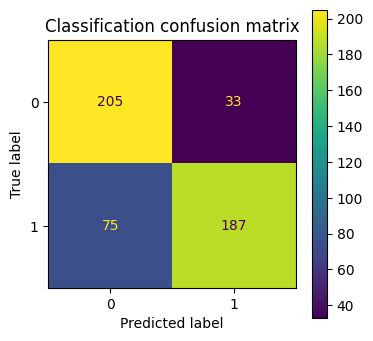

In [90]:
pipeline_base = Pipeline([
    ('vect', CountVectorizer(max_features=30000, analyzer='word', stop_words=None)),
    ('clf', MultinomialNB()),
])

pipeline_base.fit(train_texts_splt, train_labels_splt)
predictions = pipeline_base.predict(val_texts)
print(classification_report(val_labels, predictions))
print(len(vectorizer.get_feature_names_out()))

conf_matrix = confusion_matrix(val_labels, predictions)
fig, ax = plt.subplots(figsize=(4, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(ax=ax)
plt.title('Classification confusion matrix')
plt.show()

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       238
           1       0.86      0.79      0.82       262

    accuracy                           0.82       500
   macro avg       0.82      0.82      0.82       500
weighted avg       0.83      0.82      0.82       500

13


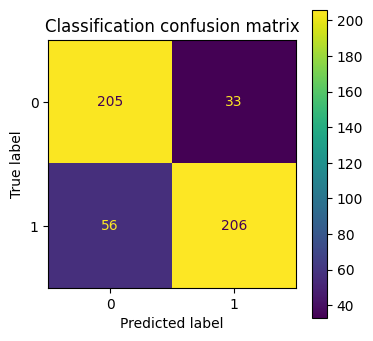

In [91]:
#we try to optimize the performance of the classifier
#we tune the paremeters to ignore the most frequent words and consider them as bigrams
pipeline_base = Pipeline([
    ('vect', CountVectorizer(max_df=0.1, ngram_range=(1, 2), max_features=30000, analyzer='word', stop_words=None)),
    ('clf', MultinomialNB()),
])

pipeline_base.fit(train_texts_splt, train_labels_splt)
predictions = pipeline_base.predict(val_texts)
print(classification_report(val_labels, predictions))
print(len(vectorizer.get_feature_names_out()))

conf_matrix = confusion_matrix(val_labels, predictions)
fig, ax = plt.subplots(figsize=(4, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(ax=ax)
plt.title('Classification confusion matrix')
plt.show()


              precision    recall  f1-score   support

           0       0.83      0.87      0.85       238
           1       0.88      0.84      0.86       262

    accuracy                           0.85       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.85      0.85      0.85       500

13


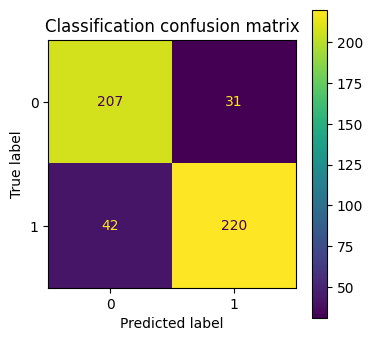

In [92]:
from sklearn.linear_model import LogisticRegression

pipeline_base = Pipeline([
    ('vect', CountVectorizer(max_df=0.1, ngram_range=(1, 2), max_features=30000, analyzer='word', stop_words=None)),
    ('clf',  LogisticRegression()),
])

pipeline_base.fit(train_texts_splt, train_labels_splt)
predictions = pipeline_base.predict(val_texts)
print(classification_report(val_labels, predictions))
print(len(vectorizer.get_feature_names_out()))

conf_matrix = confusion_matrix(val_labels, predictions)
fig, ax = plt.subplots(figsize=(4, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(ax=ax)
plt.title('Classification confusion matrix')
plt.show()

With a `LogisticRegression` classifier and the finals parameters we chose to use in `CountVectorizer`, we eventually obtain a satisfying performance with our classifier having an accuracy of `85%`.

#### **Testing the classifier on our reviews**

In [217]:
# Creation of one big list where each element is a review
# We only keep the reviews belonging to the periods -1, 0 or 1
# and the ones with the text correctly scraped

periods = [-1, 0, 1]

texts = []
before_after = []
ratings = []

for i in range(len(df)):
    for j in range(len(df.texts[i])):
        if 'No review' not in df.texts[i][j] and df.before_after[i][j] in periods :
            texts.append(df.texts[i][j])
            before_after.append(df.before_after[i][j])
            ratings.append(df.ratings[i][j])


In [218]:
# Check if we are going to work with a sufficiently large number of reviews to be representative
len(texts)

59194

In [94]:
predictions = pipeline_base.predict(texts)

In [95]:
D_pred = {0 : 'Negative', 1 : 'Positive'}

In [96]:
def plot_class(predictions) : 

    # Constructing a dictionary
    reviews_count = {}
    for period in before_after:
        reviews_count.setdefault(period, {'Positive': 0, 'Negative': 0})
    # Filling it with the predictions
    for prediction, period in zip(predictions, before_after):
        reviews_count[period][D_pred[prediction]] += 1


    # Normalizing relatively to the number of reviews 
    for period in before_after :
        tot = reviews_count[period]['Positive'] + reviews_count[period]['Negative'] 
        reviews_count[period]['Positive'] = reviews_count[period]['Positive']*100/tot
        reviews_count[period]['Negative'] = reviews_count[period]['Negative']*100/tot

    # Printing the negative reviews rate 
    print('Negative review rate before : ', reviews_count[-1]['Negative'])
    print('Negative review rate during : ', reviews_count[0]['Negative'])
    print('Negative review rate after : ', reviews_count[1]['Negative'])


    # Constructing and tracing the figure
    fig = go.Figure()

    for period, counts in reviews_count.items():
        fig.add_trace(go.Bar(x=[period], y=[counts['Positive']], name='Positive', marker_color='blue'))
        fig.add_trace(go.Bar(x=[period], y=[counts['Negative']], name='Negative', marker_color='red'))

    fig.update_layout(title='Classification of reviews according to the period',
                    xaxis=dict(title='Period'), yaxis=dict(title='Number of reviews'),
                    barmode='stack')

    fig.show()


In [97]:
plot_class(predictions)

Negative review rate before :  32.510124385305176
Negative review rate during :  35.96332418384629
Negative review rate after :  36.75338189386056


These results are in agreement with what we obtained previously. The classification by the texts is a little more pessimistic since there are generally more negative reviews. But the tendency of the share of negative reviews to increase between the periods is still observable going from `32.5%` to `36.7%`. And once again the increase is seen as soon as the films are nominated.

#### **Quantifying the negativity**

We are going to look a little more in detail at the reviews that have obtained the qualification of negative. We do not have the necessary training set to carry out multi-classification, so we will once again study the ratings associated with the reviews.

In [224]:
index = [i for i  in range(len(predictions)) if predictions[i]==0 and not isinstance(ratings[i], str)]  #some reviews have no ratings
texts_neg = [texts[i] for i in index]
before_after_neg = [before_after[i] for i in index]
ratings_neg = [ratings[i] for i in index]

In [225]:
D_period = {-1:'Before', 0:'During', 1:'After'}
colors = colors = ['blue', 'green', 'red', 'orange', 'purple', 'yellow', 'pink', 'cyan', 'magenta', 'gray']
data = []

for period in periods:
    period_ratings = [rating for i, rating in enumerate(ratings_neg) if before_after_neg[i] == period]
    unique_ratings, counts = np.unique(period_ratings, return_counts=True)
    normalized_counts = counts / np.sum(counts)*100
    text = [f'Rating: {rating}' for rating in unique_ratings]
    bar_color = [colors[rating - 1] for rating in unique_ratings]  # Changer la couleur en fonction de la note
    data.append(go.Bar(x=[period] * len(unique_ratings),y=normalized_counts, name=period, text=text,
                       hovertemplate='Rate: %{y:.2f}%', marker=dict(color=bar_color)))

layout = go.Layout(
    title='Ratings distribution of reveiws by period',
    xaxis=dict(title='Period'),
    yaxis=dict(title='Count'),
    barmode = 'stack')

fig = go.Figure(data=data, layout=layout)
fig.show()




We can see that there are a lot of false negatives. For the lowest rating, the difference is once again pronounced between 'before' and the 'during' and 'after' periods, those last having a higher percentage of really negative appreciations : `22,47%` against `26,34%` and `26,31%` respectively. 
<br>The gap fades as the ratings increase but becomes again marked for the highest rating (with the tendency inverse) : `12,78%` against `7,49%` and `8,09%` respectively.

#### **Logit regression**

Now that we obtained a classification for our reviews, we can try to study the link between the label `positive` or `negative` of a review and the period during which it was posted. 
<br>Since we obtained in our study, very similar results with the periods 'during' and 'after', we are now going to consider them as one unique period. 
<br>We are studying the links between two binary variables, so we will perform a logistic regression.

In [ ]:
strict_before_after = [i if i==1 else i+1 for i in before_after]

In [202]:
data = pd.DataFrame({'period' : strict_before_after, 'prediction' : predictions})

In [205]:
pd.crosstab(data.period, data.prediction)

prediction,0,1
period,,
0,8991,18665
1,11456,20082


In [207]:
r1 = 8991/(8991+18665)*100
r2 = 11456/(11456+20082)*100
print('Percentage of negative reviews during "before" period : ', r1)
print('Percentage of negative reviews during "after" period : ', r2)

Percentage of negative reviews during "before" period :  32.510124385305176
Percentage of negative reviews during "after" period :  36.32443401610755


At first glance, studying the cross-frequency table, there is no particular trend between the period and the sentiment of the review, except what we have already observed.
<br>We are going to take a closer look.

In [208]:
import statsmodels.api as sm

X = np.array(strict_before_after).reshape(-1,1)
X = sm.add_constant(X)
y = predictions.reshape(-1,1)

In [209]:
model = sm.Logit(y, X)
result = model.fit()

print(result.summary())


Optimization terminated successfully.
         Current function value: 0.643765
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                59194
Model:                          Logit   Df Residuals:                    59192
Method:                           MLE   Df Model:                            1
Date:                Sun, 02 Jul 2023   Pseudo R-squ.:                0.001244
Time:                        23:08:39   Log-Likelihood:                -38107.
converged:                       True   LL-Null:                       -38155.
Covariance Type:            nonrobust   LLR p-value:                 1.945e-22
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7304      0.013     56.898      0.000       0.705       0.756
x1            -0.1691      0.

The pseudo-R2 is very weak: only `0.1%` of the variations in sentiment classification are explained by the model.
<br>However, the p-values ​​of the coefficients are null so they are statistically significant. The coefficient in front of X is negative, i.e. being during the 'after' period decreases the probability of obtaining a positive review. And, the final Z-index is  : `(0.7304 - 0.1691*period)`. 

In [213]:
def link(x):
    return 1/(1+mt.exp(-x))
print(link(0.7304))
print(link(0.7304 - 0.1691))

0.6748930436906732
0.6367532818067092


After applying the link function of the logistic regression, we obtain :
<br>• P(predictiont=1|OO=0) = `0,67` 
<br>• P(prediction=1|OO=1) = `0,64` 
<br>Thus, being during the 'after' period decreases the probability of obtaining a positive review by **`4,5%`**.

## III- Conclusion

Through the different approaches we have conducted to tackle the problem, we have obtained quite similar results.
<p> The analysis of ratings revealed that they tended to be worse afterwards, starting from the moment when films were nominated for awards. Subsequently, performing sentiment analysis on the text of reviews confirmed this finding. Finally, the logistic regression approach allowed us to quantify it: when a movie is nominated for an award, the probability of receiving a negative review increases by 4.5%. 
<p> There are several possible interpretations for this result. When a movie is nominated for an award, expectations become higher. If the film fails to meet these elevated expectations, it can result in more negative critiques. Additionally, the nomination brings visibility to the movie. Whereas before it may have only been watched by fans of its genre, its exposure opens it up to a wider audience. This can lead to people who wouldn't have normally watched the film to do so, and consequently, potentially more negative evaluations.